In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ptitprince as ptp
import scipy.stats as ss
import statsmodels.formula.api as smf
import matplotlib.collections as clt
import re
import pylab as pl

# To ensure I can export text correctly
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline
os.getcwd()

from nems_lbhb.pupil_behavior_scripts.mod_per_state import get_model_results

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2018-10-03 162151.log
[nems_web INFO] Found setting: SECRET_KEY in nems_web.configs.settings, setting value in environment ... 
[nems_web INFO] Found setting: DEBUG in nems_web.configs.settings, setting value in environment ... 
[nems_web INFO] No value specified for: PORT. Using default value in nems_web.configs.defaults
[nems_web INFO] Found setting: CSRF_ENABLED in nems_web.configs.settings, setting value in environment ... 
[nems_web INFO] Found setting: CSRF_SESSION_KEY in nems_web.configs.settings, setting value in environment ... 


In [7]:
# pup vs. active/passive
batch = 307  # A1 SUA and MUA
state_list = ['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh']
basemodel = "-ref-psthfr.s_stategain.S"

#d_pup_beh = get_model_results(batch=batch, state_list=state_list, basemodel=basemodel)
d_pup_beh = pd.read_csv('d_pup_beh.csv')

In [6]:
#d_pup_beh.to_csv('d_pup_beh.csv')

In [13]:
# pup vs. pre/post passive
state_list = ['st.pup0.pas0','st.pup0.pas',
              'st.pup.pas0','st.pup.pas']
basemodel = "-ref-pas-psthfr.s_stategain.S"
#d_pup_pas = get_model_results(batch=batch, state_list=state_list, basemodel=basemodel)
d_pup_pas = pd.read_csv('d_pup_pas.csv')

In [10]:
#d_pup_pas.to_csv('d_pup_pas.csv')

In [14]:
# pup vs. per file
state_list = ['st.pup0.fil0','st.pup0.fil','st.pup.fil0','st.pup.fil']
basemodel = "-ref-psthfr.s_stategain.S"
d_pup_fil = get_model_results(batch=batch, state_list=state_list, basemodel=basemodel)
d_pup_fil = pd.read_csv('d_pup_fil.csv')

Loading modelname:  psth.fs20.pup-ld-st.pup0.fil0-ref-psthfr.s_stategain.S_jk.nf20-basic
Loading modelname:  psth.fs20.pup-ld-st.pup0.fil-ref-psthfr.s_stategain.S_jk.nf20-basic
Loading modelname:  psth.fs20.pup-ld-st.pup.fil0-ref-psthfr.s_stategain.S_jk.nf20-basic
Loading modelname:  psth.fs20.pup-ld-st.pup.fil-ref-psthfr.s_stategain.S_jk.nf20-basic


In [15]:
#d_pup_fil.to_csv('d_pup_fil.csv')

In [9]:
d_pup_beh.loc[d_pup_beh['cellid']=='TAR010c-06-1',
              ['state_sig','state_sig0','state_chan','r','r0','r_unique','MI','MI_unique']] 

,state_sig,state_sig0,state_chan,r,r0,r_unique,MI,MI_unique
141,st.pup.beh,st.pup0.beh0,baseline,0.700703,0.622926,0.0777769,NaN,NaN
142,st.pup.beh,st.pup0.beh,pupil,0.700703,0.624738,0.0759643,0.281452,0.251508
143,st.pup.beh,st.pup.beh0,active,0.700703,0.701453,-0.000750652,0.0667815,-0.0353007


In [4]:
# to look at unique variance explained we need to square r and r0 and then take the difference
# create three new colums R2 R02 and delta_R2
d_pup_beh['R2']=d_pup_beh['r']**2
d_pup_beh['R02']=d_pup_beh['r0']**2
d_pup_beh['R2_unique']=d_pup_beh['R2']-d_pup_beh['R02']

In [5]:
# add column to specify if cellid has significant effect of any state variable (specific to baseline raw)
d_pup_beh['sig_var']=np.where(d_pup_beh['r_unique']>2*d_pup_beh['r_se'], 1, 0)

# next is an unelegant trick to get the values in raws that are not 'baseline' off the equation
mask = d_pup_beh.state_chan != 'baseline'
column = 'sig_var'
d_pup_beh.loc[mask, column] = 'NaN'

d_pup_beh.head()

,cellid,modelname,state_sig,state_sig0,state_chan,MI,r,r_se,d,g,MI0,r0,r0_se,r_unique,MI_unique,R2,R02,R2_unique,sig_var
0,BRT037b-63-1,psth.fs20.pup-ld-st.pup.beh-ref-psthfr.s_state...,st.pup.beh,st.pup0.beh0,baseline,NaN,0.743903,0.019168,2.98745,0.975693,NaN,0.743709,0.0184251,0.000194911,NaN,0.553392,0.553102,0.000289952,0
1,BRT037b-63-1,psth.fs20.pup-ld-st.pup.beh-ref-psthfr.s_state...,st.pup.beh,st.pup0.beh,pupil,0.0167114,0.743903,0.019168,0.0260763,-0.00408441,0.00889277,0.744072,0.019048,-0.000168127,0.00781865,0.553392,0.553643,-0.000250169,NaN
2,BRT037b-63-1,psth.fs20.pup-ld-st.pup.beh-ref-psthfr.s_state...,st.pup.beh,st.pup.beh0,active,0.0179768,0.743903,0.019168,0.108336,0.0587441,0.00688582,0.743838,0.0187941,6.49866e-05,0.011091,0.553392,0.553296,9.66833e-05,NaN
3,BRT037b-30-1,psth.fs20.pup-ld-st.pup.beh-ref-psthfr.s_state...,st.pup.beh,st.pup0.beh0,baseline,NaN,0.775877,0.0134827,2.05101,0.972697,NaN,0.776267,0.0130804,-0.000390824,NaN,0.601984,0.602591,-0.000606615,0
4,BRT037b-30-1,psth.fs20.pup-ld-st.pup.beh-ref-psthfr.s_state...,st.pup.beh,st.pup0.beh,pupil,0.00735845,0.775877,0.0134827,0.0374866,-0.0184058,0.0044394,0.776262,0.0134037,-0.000385336,0.00291905,0.601984,0.602583,-0.000598095,NaN


In [6]:
# function to create a list of color names based on significant state variable effect in A1 cells
def pltcolor(lst,state):
    colors=[]
    for val in lst:
        if val==0:
            colors.append('lightgrey')
        elif val==1 and state=='beh':
            colors.append('#82418B')
        elif val==1 and state=='pup':
            colors.append('#2E7E3E')
    return colors

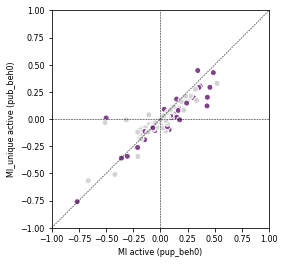

In [37]:
# Plot unique contribution of pupil in terms of MI. MIp_unique = MIfull-MIp. MI_unique can be thought of 
# as the unique contribution of pupil when behavior is passive

# extract a new pandas only with raws that have pupil as state_chan value
d_beh=d_pup_beh[d_pup_beh['state_chan']=='active']

# Create the colors list using the function pltcolor
colors=pltcolor(d_pup_beh['sig_var'],'beh')

fig, ax = plt.subplots()

# plot
ax.scatter(d_beh['MI'], d_beh['MI_unique'], color=colors, edgecolors='white')
ax.set_xlabel('MI active (pup_beh0)')
ax.set_ylabel('MI_unique active (pub_beh0)')
ax.set_aspect('equal')

# set the limits
plt.ylim(-1, 1)
plt.xlim(-1, 1)

# need a slope and c to fix the position of line
slope = 1
c = -1

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
ax.set_xlim([x_min, x_max])


# add horizontal line
slope = 0
c = 0

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
ax.set_xlim([x_min, x_max])

# add vertical line
xposition = 0.00
plt.axvline(x=xposition, color='k', linestyle='--', linewidth=0.5)

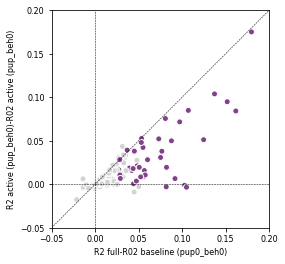

In [38]:
# Plot unique contribution of pupil in terms of variance explained. 

d_baseline=d_pup_beh[d_pup_beh['state_chan']=='baseline']
d_pupil=d_pup_beh[d_pup_beh['state_chan']=='pupil']
d_behavior=d_pup_beh[d_pup_beh['state_chan']=='active']

colors=pltcolor(d_pup_beh['sig_var'],'beh')
fig, ax = plt.subplots()

# plot
# set the limits
plt.ylim(-0.05, 0.2)
plt.xlim(-0.05, 0.2)

plt.axhline(0, linestyle='--', linewidth=0.5, color='k')
plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.plot([-0.05,0.2],[-0.05, 0.2], linestyle='--',linewidth=0.5, color='k')

ax.scatter(d_baseline['R2']-d_baseline['R02'],d_behavior['R2']-d_behavior['R02'], color=colors, edgecolors='white')
ax.set_xlabel('R2 full-R02 baseline (pup0_beh0)')
ax.set_ylabel('R2 active (pup_beh0)-R02 active (pup_beh0)')
ax.set_aspect('equal')

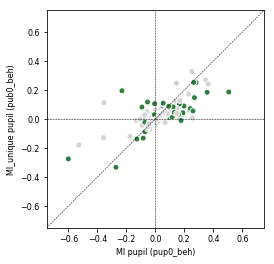

In [39]:
# Plot unique contribution of behavior in terms of MI. MIb_unique = MIfull-MIb. MI_unique can be thought of 
# as the unique contribution of behavior when pupil is large

# extract a new pandas only with raws that have pupil as state_chan value
d_pup=d_pup_beh[d_pup_beh['state_chan']=='pupil']

# Create the colors list using the function pltcolor
colors=pltcolor(d_pup_beh['sig_var'],'pup')

# plot
fig, ax = plt.subplots()
ax.scatter(d_pup['MI'], d_pup['MI_unique'], color=colors, edgecolors='white')
ax.set_xlabel('MI pupil (pup0_beh)')
ax.set_ylabel('MI_unique pupil (pub0_beh)')
ax.set_aspect('equal')

# set the limits
plt.ylim(-0.75, 0.75)
plt.xlim(-0.75, 0.75)

# need a slope and c to fix the position of line
slope = 1
c = -0.75

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
ax.set_xlim([x_min, x_max])


# add horizontal line
slope = 0
c = 0

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
ax.set_xlim([x_min, x_max])

# add vertical line
xposition = 0.00
plt.axvline(x=xposition, color='k', linestyle='--', linewidth=0.5)

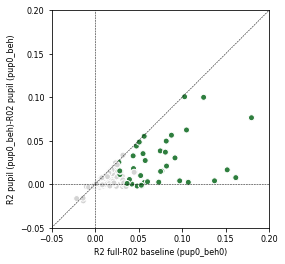

In [40]:
# Plot unique contribution of behavior in terms of variance explained. 

d_baseline=d_pup_beh[d_pup_beh['state_chan']=='baseline']
d_pupil=d_pup_beh[d_pup_beh['state_chan']=='pupil']
d_behavior=d_pup_beh[d_pup_beh['state_chan']=='active']

colors=pltcolor(d_pup_beh['sig_var'],'pup')
fig, ax = plt.subplots()

# plot
# set the limits
plt.ylim(-0.05, 0.2)
plt.xlim(-0.05, 0.2)

plt.axhline(0, linestyle='--', linewidth=0.5, color='k')
plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.plot([-0.05,0.2],[-0.05, 0.2], linestyle='--',linewidth=0.5, color='k')

ax.scatter(d_baseline['R2']-d_baseline['R02'],d_pupil['R2']-d_pupil['R02'], color=colors, edgecolors='white')
ax.set_xlabel('R2 full-R02 baseline (pup0_beh0)')
ax.set_ylabel('R2 pupil (pup0_beh)-R02 pupil (pup0_beh)')
ax.set_aspect('equal')